---
title: "Logistic Regression implementation from scratch with Python"
date: "2025-01-14"
author: Anushka Dhiman
categories: [Machine Learning]
---
___

## Logistic Regression 

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values of the independent variables to a value between 0 and 1, which represents the probability of the dependent variable being 1.

The logistic function is defined as:

$$ p = \frac{1}{1 + e^{-z}} $$

where:
- \( p \) is the predicted probability of the dependent variable being 1.
- \( e \) is the base of the natural logarithm.
- \( z \) is the linear combination of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

After training model, model takes input value of the  independent variables and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a user defined threshold probability value.

## Logistic regression Code Implementation using python

Here's an example implementation using gradient descent optimization:

In [2]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate # The learning rate controls how large the update step will be.
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent optimization
        for i in range(self.n_iters):
            # calculate predicted probabilities and cost
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # the logistic loss or binary cross-entropy. It computes how well the predicted probabilities (y_pred) match the actual target values (y).
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
            
            # calculate gradients of the cost function wrt weights.
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) # the average of the product of the error (y_pred - y) and each feature (X.T).
            db = (1 / n_samples) * np.sum(y_pred - y) # the average of the errors.
             
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        # calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # convert probabilities to binary predictions
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):

        """Implements the sigmoid function, which maps any real-valued number to a value between 0 and 1."""

        return 1 / (1 + np.exp(-z))


Let's test our code

Assume we have some training data (X) and corresponding labels (y), and we want to fit a logistic regression model to it.

In [3]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]


[1 1]


The model predicts [1, 1], which corresponds to:

Sample 1: The predicted probability is greater than 0.5, so the model predicts 1, which matches the actual label.

Sample 2: The predicted probability is greater than 0.5, so the model predicts 1, which matches the actual label.


Here in the code, we will add regularization and use a more sophisticated optimization algorithm to improve the code

1. Mini-Batch Gradient Descent is used: In each iteration, a random batch of data is selected, and the model computes the predictions and updates the weights and bias using mini-batch gradient descent.

2. Apply Regularization (if specified): Regularization is added to prevent overfitting by penalizing large weights.

L1 Regularization: The L1 regularization term penalizes the sum of the absolute values of the weights.
L2 Regularization: The L2 regularization term penalizes the sum of the squares of the weights


In [4]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


Let's test our code

In [5]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]


[1 1]


## Visualization

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

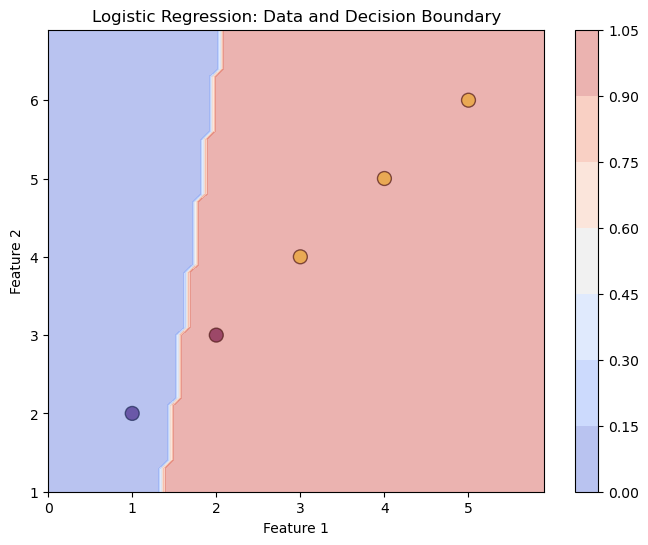

In [6]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# Plot the input data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)

# Create a grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict over the grid
Z = Z.reshape(xx.shape)  # Reshape to fit the grid

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.colorbar()

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression: Data and Decision Boundary')

# Show plot
plt.show()